4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import prepare

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire 


In [2]:
4. #Print first 3 rows of dataset
iris = sns.load_dataset('iris') 

iris = data('iris')

print(iris.head(3))

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [3]:
#Print the number of rows and columns of the data set
iris.shape

(150, 5)

In [4]:
#Print the data type of each column and the names
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
#Print the summary statistics for each of the numeric variables
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Print the print the unique values for each of your categorical variables
iris.Species.unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
#5.Print the first 3 rows 

import pandas as pd

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
#print the number of rows and columns

df_google.shape

(891, 12)

In [9]:
#print the column data type and names

df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#print the summary statistics for each of the numeric variables
df_google.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# print the unique values for each of your categorical variables


In [12]:
df_google.Sex.unique()

array(['male', 'female'], dtype=object)

In [13]:
df_google.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
#6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

df_excel = pd.read_excel('train.xlsx')
df_excel

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450.0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536.0,13.0000,NaN,S
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053.0,30.0000,B42,S
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369.0,30.0000,C148,C


In [15]:
#assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.iloc[:100]
df_excel_sample


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00,0.0,0.0,373450.0,8.0500,NaN,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877.0,8.4583,NaN,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.00,0.0,0.0,17463.0,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00,3.0,1.0,349909.0,21.0750,NaN,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0.0,2.0,347742.0,11.1333,NaN,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1.0,0.0,237736.0,30.0708,NaN,C


In [16]:
#print the number of rows of your original dataframe

df_excel.shape[0]

891

In [17]:
#print the first 5 column names

df_excel.columns[:5]


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [18]:
#print the column names that have a data type of object
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [19]:
#print the column names that have a data type of object

df_excel[['Name','Sex','Ticket','Cabin','Embarked']]



,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803.0,C123,S
4,"Allen, Mr. William Henry",male,373450.0,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536.0,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053.0,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369.0,C148,C


In [20]:
#print the column names that have a data type of object

df_excel.select_dtypes(include='object').head()


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803.0,C123,S
4,"Allen, Mr. William Henry",male,373450.0,NaN,S


In [21]:
#compute the range for each of the numeric variables.

titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats


,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [22]:
#compute the range for each of the numeric variables.

titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min']
titanic_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


# Data Preparation Exercises 

In [23]:
# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

In [24]:
df_iris = acquire.new_iris_data()
df_iris

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
5,1,setosa,5.4,3.9,1.7,0.4
6,1,setosa,4.6,3.4,1.4,0.3
7,1,setosa,5.0,3.4,1.5,0.2
8,1,setosa,4.4,2.9,1.4,0.2
9,1,setosa,4.9,3.1,1.5,0.1


In [25]:
#2. 
columns_to_drop = ['species_id']

In [26]:
columns_to_drop

['species_id']

In [27]:
df_iris = df_iris.drop(columns = columns_to_drop) 

In [28]:
#3.
df_iris.rename(columns={'species_name':'species'}, inplace = True)

df_iris

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


In [29]:
4. #Encoding variables, Dummy variables 
dummy_df = pd.get_dummies(df_iris[['species']], dummy_na=False, drop_first=[True])

dummy_df

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [30]:
#concatenate

df_iris = pd.concat([df_iris, dummy_df], axis=1)
df_iris

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


In [31]:
#5. 
def prep_iris_data(df):
    '''
    Takes in a iris dataframe and returns a cleaned dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: prep_df - a dataframe with the cleaning operations performed on it
    '''
    
    #rename species name to species 
    df.rename(columns={'species_name':'species'}, inplace = True)
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['species_id']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables(changed these categorical variables to numerical values for ML)
    dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [32]:
df = acquire.new_iris_data()

prep_iris_data(df)


,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


# Titanic dataset 

In [33]:
#1. Use the function defined in acquire.py to load the Titanic data.

titanic = acquire.new_titanic_data()
titanic



,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [34]:
# 2. Drop any unnecessary, unhelpful, or duplicated columns.
titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [35]:
#3. Encode the categorical columns. 
#Create dummy variables of the categorical columns and concatenate them onto the dataframe.

dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [36]:
titanic = pd.concat([titanic, dummy_df], axis=1)
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [37]:
#4. Create a function named prep_titanic that accepts the raw titanic data, 
#and returns the data with the transformations above applied.

def prep_titanic(titanic):
    titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
    dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
    titanic = pd.concat([titanic, dummy_df], axis=1)
    
    return titanic

In [38]:
df = acquire.get_titanic_data()

df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


# Telco dataset

In [39]:
#1 Use the function defined in acquire.py to load the Telco data.



telco = acquire.new_telco_data()

telco

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [40]:
#Make data look better 
telco.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [41]:
#2.Drop any unnecessary, unhelpful, or duplicated columns. 
#This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [42]:
pd.crosstab(telco.payment_type, telco.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [43]:
pd.crosstab(telco.contract_type_id, telco.contract_type)


contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [44]:
pd.crosstab(telco.internet_service_type, telco.internet_service_type_id)


internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
None,0,0,1526


In [45]:
telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [46]:
telco.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [47]:
#Drop any unnecessary, unhelpful, or duplicated columns. 
#This could mean dropping foreign key columns but
#keeping the corresponding string values, 
#for example.

for col in telco.columns:
    print(telco[col].value_counts())
    print()

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
52     80
64     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
27     72
29     72
30     72
63     72
20     71
53     70
62     70
41     70
32     69
50     68
54     68
47     68
51     68
58     67
49     66
31     65
43  

In [48]:
#3. Encode the categorical columns. 
#Create dummy variables of the categorical columns and concatenate them onto the dataframe.

telco.gender.map({'Female':1, 'Male':0})

0       1
1       0
2       0
3       0
4       1
       ..
7038    1
7039    0
7040    0
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

In [49]:
# encode binary categorical variables into numeric values
telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})

telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})

telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})

telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})

telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})

telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})

In [50]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,No,One year,DSL,Mailed check,1,1,1,1,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1


In [51]:
dummy_df = pd.get_dummies(telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'
                            ]],
                              drop_first=True)
dummy_df.head()

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [52]:
telco = pd.concat( [telco, dummy_df], axis=1 )
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [53]:
#4. Create a function named prep_telco that accepts the raw telco data, 
#and returns the data with the transformations above applied.

def prep_telco(telco):
    telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

    telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(telco[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type'
                            ]],
                              drop_first=True)
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    return telco

In [54]:
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


# Split Data

In [55]:
#1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

def my_train_test_split(df, target):
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

In [56]:
df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [57]:
target = 'species'


In [58]:
#2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

train_iris, validate_iris, test_iris = my_train_test_split(df_iris, target)

print(f'Prepared df: {df_iris.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')


Prepared df: (150, 7)

Train: (90, 7)
Validate: (30, 7)
Test: (30, 7)


In [59]:
#3. Run the function on the Titanic dataset, returning 3 datasets, train_telco, validate_telco and test_telco.
titanic.head()


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [60]:
target = 'survived'


In [61]:
train_titanic, validate_titanic, test_titanic = my_train_test_split(titanic, target)


In [62]:
print(f'Prepared df: {titanic.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [63]:
#4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [64]:
target = 'churn'


In [65]:
train_telco, validate_telco, test_telco = my_train_test_split(telco, target)


In [66]:
print(f'Prepared df: {telco.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Prepared df: (7043, 48)

Train: (4225, 48)
Validate: (1409, 48)
Test: (1409, 48)


# Exploratory Analysis Exercises



In [67]:
#1 Acquire, prepare & split your data.

df = acquire.new_iris_data()

train, validate, test = prepare.prep_iris(df)

In [68]:
train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0


2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [69]:
#descriptive statistics

train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [70]:
#quantitative variable visuals (sepal_length, sepal_width, petal_length, petal_width)

num_vars = ['sepal_length','sepal_width','petal_length','petal_width']
cat_vars = ['species']

<AxesSubplot:>

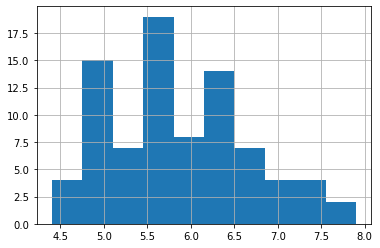

In [71]:
train.sepal_length.hist()



AxesSubplot(0.125,0.125;0.775x0.755)


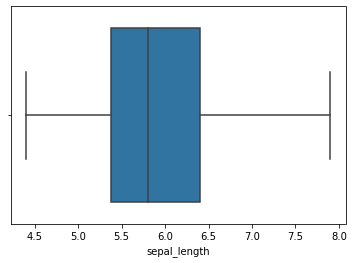

In [72]:
print(sns.boxplot(x='sepal_length', data=train))

<AxesSubplot:>

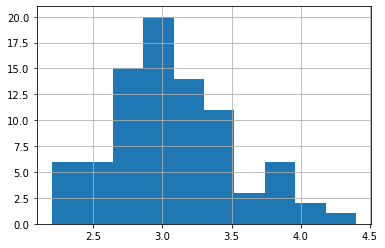

In [73]:
train.sepal_width.hist()


AxesSubplot(0.125,0.125;0.775x0.755)


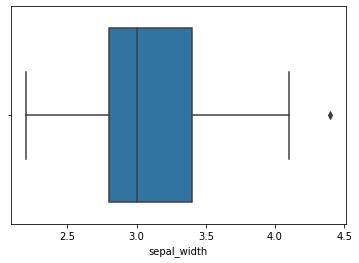

In [74]:
print(sns.boxplot(x='sepal_width', data=train))

<AxesSubplot:>

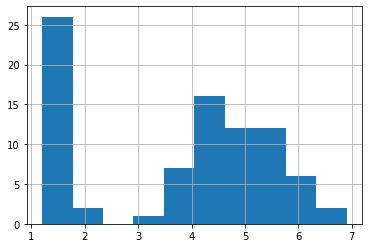

In [75]:
train.petal_length.hist()


AxesSubplot(0.125,0.125;0.775x0.755)


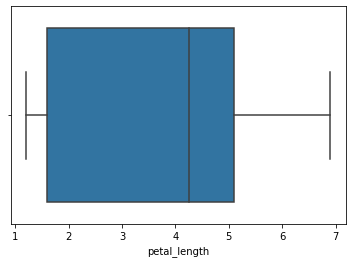

In [76]:
print(sns.boxplot(x='petal_length', data=train))

<AxesSubplot:>

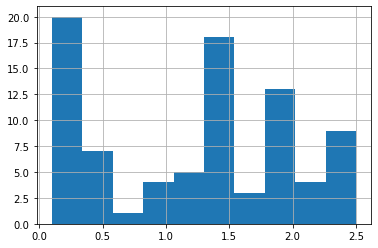

In [77]:
train.petal_width.hist()

AxesSubplot(0.125,0.125;0.775x0.755)


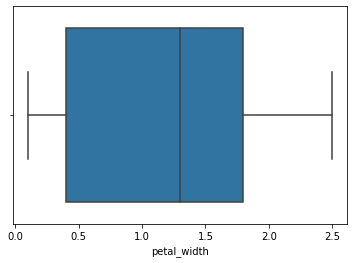

In [78]:
print(sns.boxplot(x='petal_width', data=train))

In [79]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
pd.crosstab(index=train['species'], columns='count') 


col_0,count
species,
setosa,28
versicolor,28
virginica,28


#Document takeaways & any actions.
There are an equal amount of species. 
Most species sepal lengths are 4.5 to 6.5 cm 
most species sepal width is 2.6 to 3.5 cm 
most species petal length is between 3 and 7 cm
Most specicies pedal width is between 1 and 2.5 cm


# Bivariate Stats



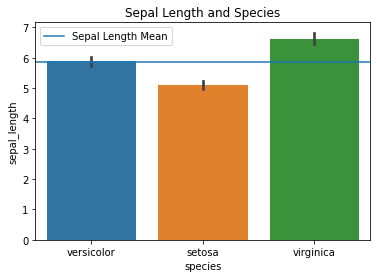

In [80]:
plt.title('Sepal Length and Species')
sns.barplot(x='species', y='sepal_length', data=train)
sepal_length_mean = train.sepal_length.mean()
plt.axhline(sepal_length_mean, label = 'Sepal Length Mean')
plt.legend()

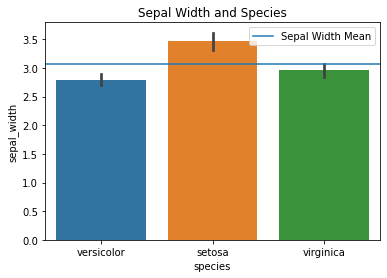

In [81]:
plt.title('Sepal Width and Species')
sns.barplot(x='species', y='sepal_width', data=train)
x = train.sepal_width.mean()
plt.axhline(x, label = 'Sepal Width Mean')
plt.legend()

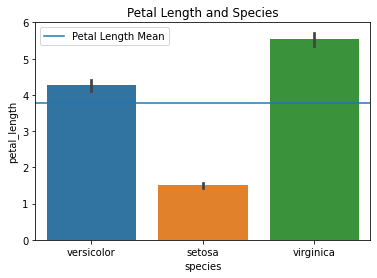

In [82]:
plt.title('Petal Length and Species')
sns.barplot(x='species', y='petal_length', data=train)
x = train.petal_length.mean()
plt.axhline(x, label = 'Petal Length Mean')
plt.legend()

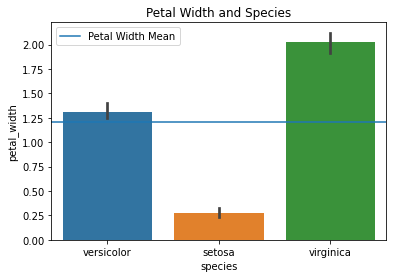

In [83]:
plt.title('Petal Width and Species')
sns.barplot(x='species', y='petal_width', data=train)
x = train.petal_width.mean()
plt.axhline(x, label = 'Petal Width Mean')
plt.legend()

In [97]:
train

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0
139,virginica,6.9,3.1,5.4,2.1,0,0,1
20,setosa,5.4,3.4,1.7,0.2,1,0,0
31,setosa,5.4,3.4,1.5,0.4,1,0,0
6,setosa,4.6,3.4,1.4,0.3,1,0,0
115,virginica,6.4,3.2,5.3,2.3,0,0,1


In [96]:
train_melt = train.melt(id_vars='species', var_name='measurement', value_name='length')
train_melt

,species,measurement,length
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
583,setosa,virginica,0.0
584,versicolor,virginica,0.0
585,versicolor,virginica,0.0
586,setosa,virginica,0.0


In [102]:
train_melt[train_melt['length'] > 0] 

,species,measurement,length
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
574,virginica,virginica,1.0
577,virginica,virginica,1.0
578,virginica,virginica,1.0
579,virginica,virginica,1.0


In [110]:
train_melt[train_melt['measurement'] != 'virginica','versicolor','setosa']

InvalidIndexError: (0       True
1       True
2       True
3       True
4       True
       ...  
583    False
584    False
585    False
586    False
587    False
Name: measurement, Length: 588, dtype: bool, 'versicolor', 'setosa')